In [1]:
from scipy.cluster.vq import kmeans
import pandas as pd
from scipy.cluster.vq import whiten
from matplotlib import pyplot as plt
from matplotlib import image as img

In [21]:
image = img.imread('img3.jpg')

In [22]:
#constructing a dataframe
df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())

In [23]:
#whitening
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']],5)

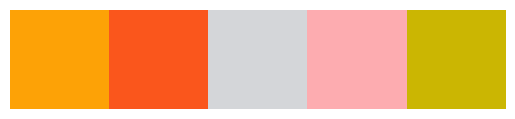

In [24]:
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.axis('off')
plt.show()